In [1]:
import numpy as np
from keras import layers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, AveragePooling2D , ZeroPadding2D
from keras.models import Model
from keras.datasets import mnist
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
(X_train , Y_train) , (X_test , Y_test) = mnist.load_data()

In [3]:
print("X_train Shape : ",X_train.shape)
print("Y_train Shape : ",Y_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_test Shape : ",Y_test.shape)

X_train Shape :  (60000, 28, 28)
Y_train Shape :  (60000,)
X_test Shape :  (10000, 28, 28)
Y_test Shape :  (10000,)


In [4]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)

X_train Shape :  (60000, 28, 28, 1)
X_test Shape :  (10000, 28, 28, 1)


In [5]:
Y_train = to_categorical(Y_train, num_classes=10, dtype='float32')
Y_test = to_categorical(Y_test, num_classes=10, dtype='float32')
print("Y_train Shape : ",Y_train.shape)
print("Y_test Shape : ",Y_test.shape)

Y_train Shape :  (60000, 10)
Y_test Shape :  (10000, 10)


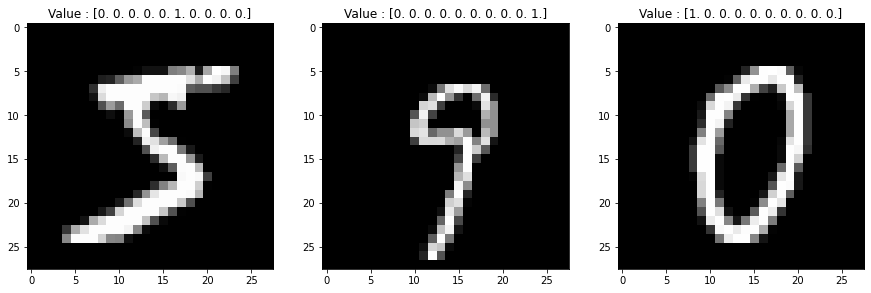

In [8]:
fig , axs  = plt.subplots(1,3 , figsize = (15 , 15))

axs[0].imshow(X_train[0][:,:,0] , cmap = 'gray')
axs[0].set_title("Value : "+str(Y_train[0]))

axs[1].imshow(X_train[1500][:,:,0] , cmap = 'gray')
axs[1].set_title("Value : "+str(Y_train[1500]))

axs[2].imshow(X_train[1000][:,:,0] , cmap = 'gray')
axs[2].set_title("Value : "+str(Y_train[1000]))

plt.show()

In [9]:
def LeNet_5(input_shape):
    
    X_input = Input(shape=input_shape)
    
    X = ZeroPadding2D(2)(X_input)
    
    X = Conv2D(6 , (5,5) , strides=(1,1), name = 'conv0')(X)
    X = BatchNormalization(axis=-1 , name= 'bn0')(X)
    X = Activation('relu' , name = 'relu0')(X)
    
    X = AveragePooling2D((2,2) , strides= (2,2))(X)
    
    X = Conv2D(16 , (5,5) , strides = (1,1) , name = 'conv1')(X)
    X = BatchNormalization(axis=-1 , name = 'bn1')(X)
    X = Activation('relu' , name = 'relu1')(X)
    
    X = AveragePooling2D((2,2) , strides= (2,2))(X)
    
    X = Flatten()(X)
    
    X = Dense(120 ,activation='relu' , name = 'fc0')(X)
    
    X = Dense(84 ,activation='relu' , name = 'fc1')(X)
    
    X = Dense(10 , activation='softmax' , name = 'fc2')(X)
    
    model = Model(X_input , X , name = "LeNet-5")
    
    return model
    

In [23]:
lenet = LeNet_5(X_train.shape[1:])

In [24]:
lenet.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 6)         24        
_________________________________________________________________
relu0 (Activation)           (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 10, 10, 16)        2416

In [25]:
lenet.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [26]:
lenet.fit(X_train,Y_train,epochs=10 , batch_size = 256 , validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.2782 - accuracy: 0.9226 - val_loss: 0.1100 - val_accuracy: 0.9727
Epoch 2/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.0713 - accuracy: 0.9784 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 3/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0531 - val_accuracy: 0.9848
Epoch 4/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0490 - val_accuracy: 0.9875
Epoch 5/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0544 - val_accuracy: 0.9847
Epoch 6/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0361 - val_accuracy: 0.9912
Epoch 7/10
54000/54000 [==============================] - 3s 62us/ste

In [27]:
preds = lenet.evaluate(X_test[:9900],Y_test[:9900])

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

9900/9900 [==============================] - 1s 96us/step
Loss = 0.03226421781274136
Test Accuracy = 0.989393949508667


In [28]:
Y_predict = lenet.predict(X_test[9900:])

In [29]:
Y_predict.shape

(100, 10)

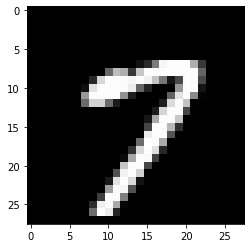

In [30]:
plt.imshow(X_test[9909][:,:,0] , cmap = 'gray')

In [31]:
print(Y_predict[9])

[4.6501469e-09 9.7639440e-07 6.5394858e-07 1.3128282e-05 5.7201279e-09
 3.8472678e-10 2.0269731e-14 9.9998486e-01 3.2859147e-09 3.9983041e-07]


In [32]:
def get_number(predicted_output):
    return (np.argmax(predicted_output)) 

In [33]:
print(get_number(Y_predict[9]))

7


                                                    PREDICTIONS                                                    


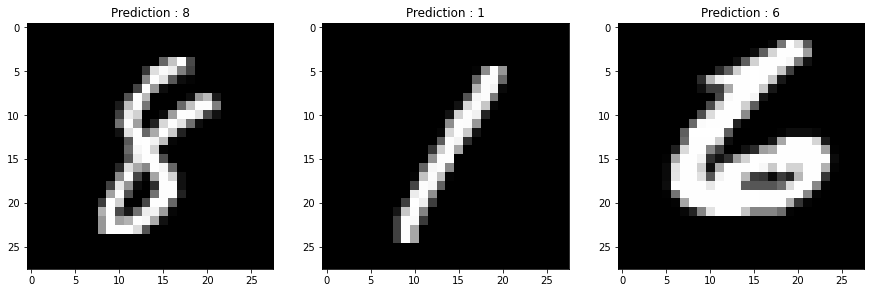

In [34]:
fig , axs = plt.subplots(1,3 ,figsize = (15,15))

axs[0].imshow(X_test[9900][:,:,0] , cmap = 'gray')
axs[0].set_title("Prediction : "+str(get_number(Y_predict[0])))

axs[1].imshow(X_test[9950][:,:,0] , cmap = 'gray')
axs[1].set_title("Prediction : "+str(get_number(Y_predict[50])))

axs[2].imshow(X_test[9999][:,:,0] , cmap = 'gray')
axs[2].set_title("Prediction : "+str(get_number(Y_predict[99])))

print(f"{'PREDICTIONS':^115}")

In [35]:
lenet.save("MNIST_Model_Saved")